In [1]:
import math
import numpy as np
import random as rd
import pandas as pd

### DataFrame 시계열 자료 다루기 string에서 datetime 자료형으로 전환 : pd.to_datetime() pd.to_datetime() 함수를 사용하여 시간 형식의 object 자료형 column을 datetime 형식으로 손쉽게 바꿀 수 있습니다.  
### pd.date_range(시작일,종료일) 혹은 (시작일,기간) 주면 시작일부터 기간까지 날짜 인덱스를 반환합니다. freq 인수로 특정날짜만 생성되게 가능합니다.
s: 초  
T: 분  
H: 시간  
D: 일(day)  
B: 주말이 아닌 평일  
W: 주(일요일)  
W-MON: 주(월요일)  
M: 각 달(month)의 마지막 날  
MS: 각 달의 첫날  
BM: 주말이 아닌 평일 중에서 각 달의 마지막 날  
BMS: 주말이 아닌 평일 중에서 각 달의 첫날  
WOM-2THU: 각 달의 두번째 목요일  
Q-JAN: 각 분기의 첫달의 마지막 날  
Q-DEC: 각 분기의 마지막 달의 마지막 날  

In [2]:
pd.date_range('2023-01', periods = 30,freq = 'B')

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
               '2023-02-03', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10'],
              dtype='datetime64[ns]', freq='B')

### shift연산을 사용하면 인덱스는 그대로 두고 데이터만 이동합니다. shift(1),shift(-1) 데이터 한칸 아래,위이동, freq 써서 날짜인덱스 이동도 가능
### strftime 메소드를 이용해서 문자열을 만드는 것도 가능합니다. s.dt.strtftime("%년 %월 %일")

### groupby 명령을 사용하여 그룹 A와 그룹 B로 구분한 그룹 데이터를 만든다.
### groupby 객체에는 groups라는 속성으로 구분한 인덱스를 반환합니다.

In [3]:
np.random.seed(0)
df2 = pd.DataFrame({
        'key1': ['A','A','B','B','A'],
        'key2': ['one','two','one','two','one'],
        'data1': [1,2,3,4,5],
        'data2':[10,20,30,40,50]})
df2 # 예를 들어 다음과 같은 데이터가 있을 때 key1의 값에 따른 data1의 합계는 어떻게 구할까?

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [4]:
groups = df2.groupby(df2.key1)
groups

In [5]:
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [6]:
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [7]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [8]:
df1['인구'].groupby([df1['연도'],df1['도시']]).sum()

연도    도시
2005  부산    3512547
      서울    9762546
2010  부산    3393191
      서울    9631482
      인천     263203
2015  부산    3448737
      서울    9904312
      인천    2890451
Name: 인구, dtype: int64

In [9]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
def change_boolean(value):
    if value == 'yes':
        return True
    elif value == 'no':
        return False
titanic.alive = titanic.alive.apply(change_boolean) # def 함수 적용할 때 이렇게도 가능
titanic.alive

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: alive, Length: 891, dtype: bool

### Matplotlib: 시각화하는 패키지(차트나 그래프), 만약 그래프가 출력되지 않는다면 %matplotlib inline을 넣어줘야 합니다.

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

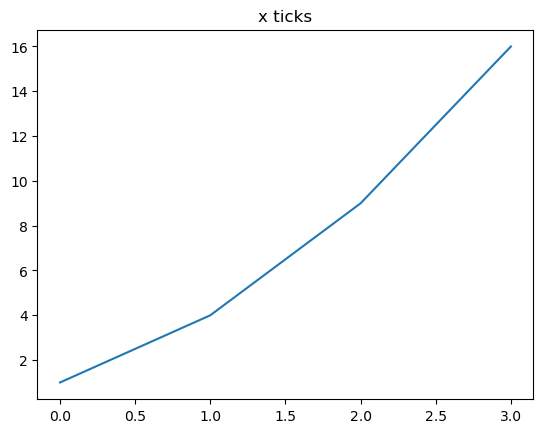

In [13]:
plt.title('x ticks') # 제목
plt.plot([1,4,9,16]) # x축 , y축 순서로 지정/ x축의 default값은 0.1...N-1
plt.show() 

### 한글 제목을 사용하기 위해서는 (Font 설치: noonnu.cc 들어가서 다운 받아도 됨)
### 설치된 폰트 사용하는 방법 1: mpl.rc('font', family = '폰트경로')- 위 코드는 mpl.rcParams['font family'] = '폰트명'과 같습니다.
### 방법 2: fontdict keyword argument를 사용하여 세부적으로 적용하는 방법

In [20]:
import matplotlib.font_manager # Font찾기
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

['NanumGothic', 'NanumGothic', 'NanumGothic', 'NanumGothic']

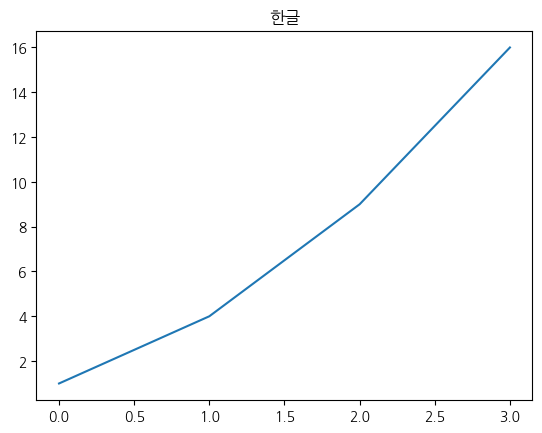

In [28]:
mpl.rcParams['font.family'] = 'NanumGothic'
#mpl.rcParams['axes.unicode_minus'] = False 마이너스 깨짐방지
plt.title('한글') # 제목
plt.plot([1,4,9,16]) # x축 , y축 순서로 지정/ x축의 default값은 0.1...N-1
plt.show() 

In [29]:
global_font = {'family' : 'NanumGothic', 'size' : 12, 'weight' : 'bold'}
# 폰트 설정
mpl.rc('font',**global_font) # pass in the font dict as kwargs
# mpl.rc('font', 'family':NanumGothic , size ,weight ) 와 같이 동작합니다

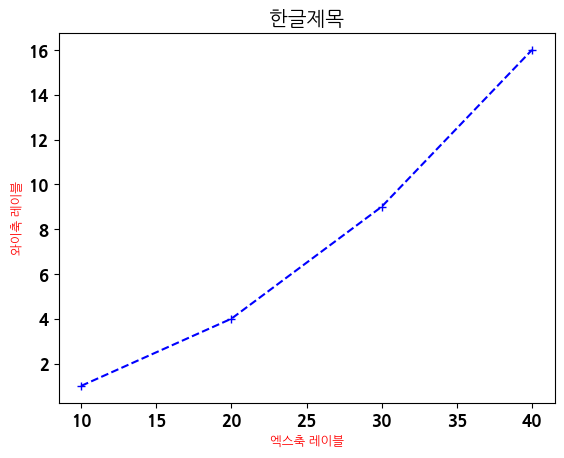

In [68]:
#mpl.rcParams['font.family'] = 'NanumGothic'
#mpl.rcParams['axes.unicode_minus'] = False 마이너스 깨짐방지
plt.title('한글제목') # 제목
plt.plot([10,20,30,40],[1,4,9,16], 'b+--') # x축 , y축 순서로 지정/ x축의 default값은 0.1...N-1, style(색상,마커,선종류)
plt.xlabel('엑스축 레이블', size='9', c='r')
plt.ylabel('와이축 레이블', size='9', c='r')
plt.show() 

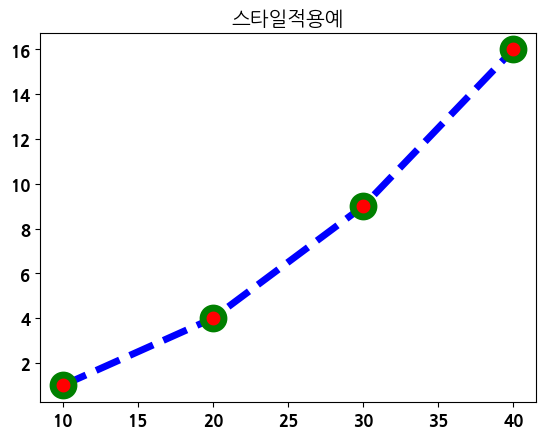

In [71]:
plt.plot([10,20,30,40],[1,4,9,16], c='b', lw=5, ls='--', marker ='o', ms=15, mec='g', mew=5, mfc='r') # ls= 선모양, marker = 마커모양, lw=선굵기, ms= 마커 사이즈, mec=마커 선 색깔, mew=마커 선 굵기, mfc = 마커 내부 색깔
plt.title('스타일적용예')
plt.show()

In [72]:
# xlim, ylim으로 최소,최대 설정가능

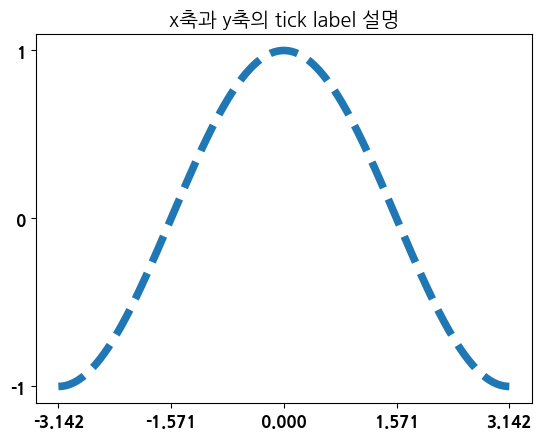

In [84]:
X = np.linspace(-np.pi, np.pi, 256)
C=np.cos(X)
plt.title('x축과 y축의 tick label 설명')
plt.plot(X,C,lw=5.5, ls='--')
plt.xticks([-np.pi, -np.pi /2,0,np.pi/2, np.pi]) # 틱을 수동 설정
plt.yticks([-1,0,1])
plt.show()

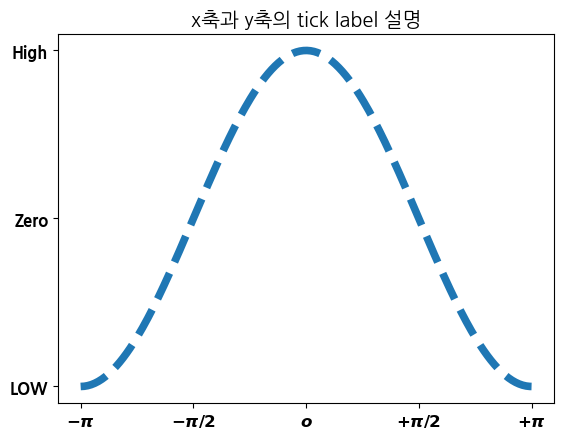

In [85]:
# 틱 사이에는 수학 문자식을 넣을 수도 있습니다.
X = np.linspace(-np.pi, np.pi, 256)
C=np.cos(X)
plt.title('x축과 y축의 tick label 설명')
plt.plot(X,C,lw=5.5, ls='--')
plt.xticks([-np.pi, -np.pi /2,0,np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$o$', r'$+\pi/2$', r'$+\pi$']) # 틱을 수동 설정 r\$수학문자$'
plt.yticks([-1,0,1],['LOW','Zero','High'])
plt.show()

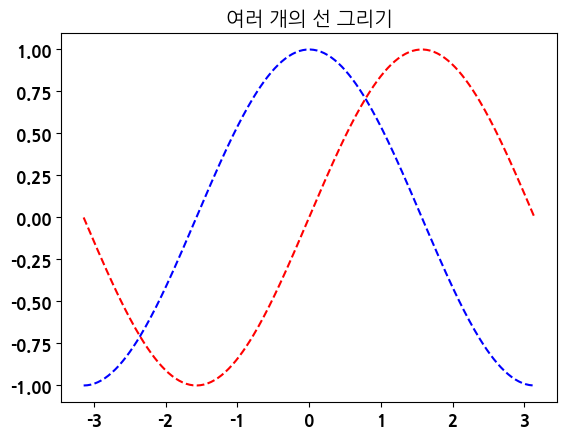

In [98]:
# 여러 개의 선 그리기,  이 때는 다 입력해야 되며 선 스타일도 직접 지정해줘야합니다. 
X = np.linspace(-np.pi, np.pi, 256)
C=np.cos(X)
D=np.sin(X)
plt.title('여러 개의 선 그리기')
plt.plot(X,C,'b--',X,D,'r--')
plt.show()

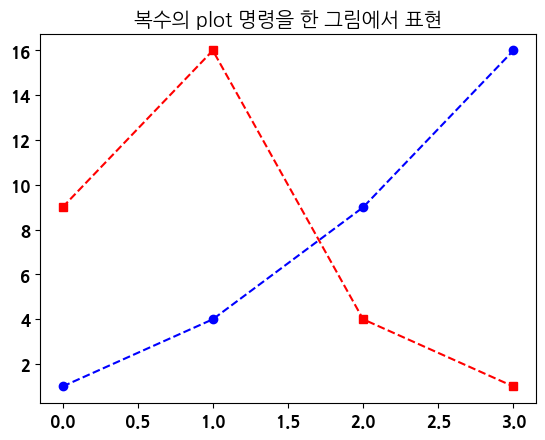

In [99]:
plt.title('복수의 plot 명령을 한 그림에서 표현')
style1 = {'c':'b', 'ls':'--', 'marker':'o'}
style2 = {'c':'r', 'ls':'--', 'marker':'s'}
plt.plot([1,4,9,16],**style1)
plt.plot([9,16,4,1],**style2)
plt.show()

In [92]:
# legend를 사용하여 범례를 추가할 수 있습니다.

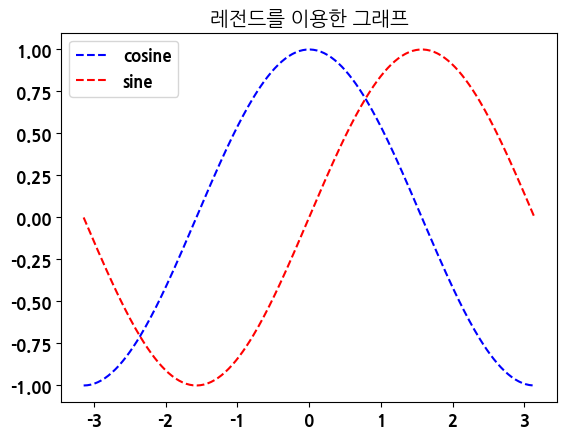

In [100]:
# legend를 이용한 플롯
X = np.linspace(-np.pi, np.pi, 256)
C=np.cos(X)
D=np.sin(X)
plt.title('레전드를 이용한 그래프')
plt.plot(X,C,'b--',label='cosine')
plt.plot(X,D,'r--',label='sine') # 따로 만들어야 범례 생성됨.
plt.legend()
plt.show()

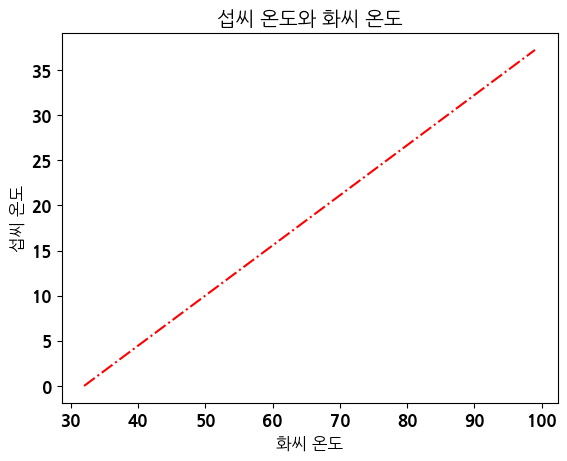

In [105]:
plt.title('섭씨 온도와 화씨 온도')
plt.xlabel('화씨 온도')
plt.ylabel('섭씨 온도')
x = [h for h in range(32,100)]
f = [(f-32)*5/9 for f in x]
plt.plot(x,f,ls='-.',c='r')
plt.show()

### matplotlib은 data를 Figure에 x-y의 좌표로 그래프를 나타냅니다. 각각의 Figure는 하나 이상의 Axes를 갖습니다. pyplot.subplots()를 사용하면 Figure,Axes로 언패킹이 되어 사용가능합니다. 그 후 Axes.plot()으로 데이터를 그립니다.
### Figure 객체는 전체 그림을 의미하는 객체입니다. Figure는 Axes, Artist, 중첩된 subfigures까지 포함할 수 있습니다. 그래서 subplots()에 인수로 row와 column으로 여러 figure를 만들 수 있습니다.

Figure(640x480)


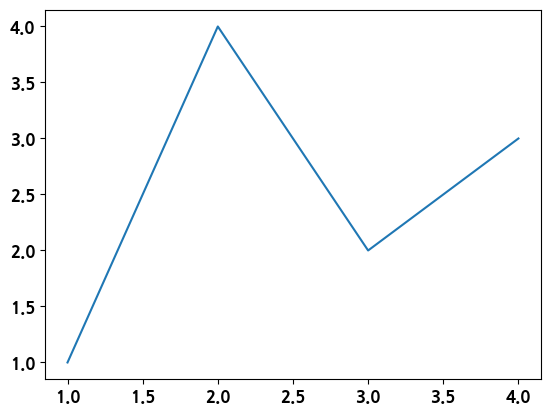

<Figure size 1000x200 with 0 Axes>

In [117]:
fig, ax = plt.subplots()
print(fig)
fig = plt.figure(figsize=(10,2))
ax.plot([1,2,3,4],[1,4,2,3])

In [107]:
fig, axs = plt.subplots(2,2) # 그래프의 크기는 figsize인수로 설정합니다.

Figure(640x480)


In [118]:
# 현재 사용하고 있는 figure 객체를 얻으려면 plt.gcf() 메서드를 사용합니다.

In [119]:
# subplot()함수는 세개의 인수를 가지는 데 처음 두개의 인수는 그래프의 행렬이고, 세번째는 위치를 나타냅니다. subplot(2, 1, 1) = 2x1모양의 첫번째,위 / subplot(2, 1, 2) = 2x1모양의 두번째,아래